<a href="https://colab.research.google.com/github/Darius2527/Farma-French-3-Factor-Markowitz-Portfolio-Optimization/blob/main/FamaFrench3Factor%2BMarkowitzMeanVarianceOptimizationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy statsmodels yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
#set stocks and time period for analysis
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "JPM", "GS"]
start_date = '2014-01-01'
end_date = '2018-01-01'

#Farma French 3 factor model

##STEP 1: Data acquisition

In [ ]:

#fetch historical stock price data
stock_data = yf.download(stocks, start=start_date, end=end_date)["Adj Close"]
#stock_data.tz_localize(None)
stock_data

[*********************100%***********************]  8 of 8 completed


Ticker,AAPL,AMZN,GOOGL,GS,JPM,MSFT,NVDA,TSLA
Date,,,,,,,,
2014-01-02 00:00:00+00:00,17.253258,19.898500,27.787050,144.011414,43.285355,31.120735,0.373992,10.006667
2014-01-03 00:00:00+00:00,16.874273,19.822001,27.584349,145.037247,43.619980,30.911366,0.369512,9.970667
2014-01-06 00:00:00+00:00,16.966288,19.681499,27.891895,146.030472,43.872807,30.258129,0.374464,9.800000
2014-01-07 00:00:00+00:00,16.844957,19.901501,28.429604,145.151215,43.367157,30.492628,0.380595,9.957333
2014-01-08 00:00:00+00:00,16.951628,20.096001,28.488768,145.273361,43.776134,29.948261,0.385782,10.085333
...,...,...,...,...,...,...,...,...
2017-12-22 00:00:00+00:00,41.216583,58.417999,53.310993,222.557907,88.156120,79.384438,4.829315,21.680000
2017-12-26 00:00:00+00:00,40.170914,58.838001,53.160866,221.483643,87.803352,79.282310,4.882984,21.152666
2017-12-27 00:00:00+00:00,40.177990,59.112999,52.879063,219.962509,87.967430,79.570099,4.876306,20.775999


In [ ]:
#calculate daily returns
stock_returns = stock_data.pct_change().dropna()
stock_returns

Ticker,AAPL,AMZN,GOOGL,GS,JPM,MSFT,NVDA,TSLA
Date,,,,,,,,
2014-01-03 00:00:00+00:00,-0.021966,-0.003845,-0.007295,0.007123,0.007731,-0.006728,-0.011980,-0.003598
2014-01-06 00:00:00+00:00,0.005453,-0.007088,0.011149,0.006848,0.005796,-0.021133,0.013401,-0.017117
2014-01-07 00:00:00+00:00,-0.007151,0.011178,0.019278,-0.006021,-0.011525,0.007750,0.016373,0.016054
2014-01-08 00:00:00+00:00,0.006332,0.009773,0.002081,0.000842,0.009431,-0.017852,0.013631,0.012855
2014-01-09 00:00:00+00:00,-0.012770,-0.002264,-0.009630,-0.005829,-0.001869,-0.006432,-0.037286,-0.024788
...,...,...,...,...,...,...,...,...
2017-12-22 00:00:00+00:00,0.000000,-0.005448,-0.001858,-0.007816,-0.003524,0.000117,-0.003166,-0.019478
2017-12-26 00:00:00+00:00,-0.025370,0.007190,-0.002816,-0.004827,-0.004002,-0.001286,0.011113,-0.024324
2017-12-27 00:00:00+00:00,0.000176,0.004674,-0.005301,-0.006868,0.001869,0.003630,-0.001368,-0.017807


In [ ]:
type(stock_returns.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
stock_returns.index = stock_returns.index.date
stock_returns

Ticker,AAPL,AMZN,GOOGL,GS,JPM,MSFT,NVDA,TSLA
2014-01-03,-0.021966,-0.003845,-0.007295,0.007123,0.007731,-0.006728,-0.011980,-0.003598
2014-01-06,0.005453,-0.007088,0.011149,0.006848,0.005796,-0.021133,0.013401,-0.017117
2014-01-07,-0.007151,0.011178,0.019278,-0.006021,-0.011525,0.007750,0.016373,0.016054
2014-01-08,0.006332,0.009773,0.002081,0.000842,0.009431,-0.017852,0.013631,0.012855
2014-01-09,-0.012770,-0.002264,-0.009630,-0.005829,-0.001869,-0.006432,-0.037286,-0.024788
...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,-0.005448,-0.001858,-0.007816,-0.003524,0.000117,-0.003166,-0.019478
2017-12-26,-0.025370,0.007190,-0.002816,-0.004827,-0.004002,-0.001286,0.011113,-0.024324
2017-12-27,0.000176,0.004674,-0.005301,-0.006868,0.001869,0.003630,-0.001368,-0.017807
2017-12-28,0.002813,0.003248,-0.004009,0.002149,0.005316,0.000117,0.001167,0.011937


In [ ]:
#fetch farma french factor data from Kenneth French's data library
ff_factors = pd.read_csv('F-F_Research_Data_Factors_daily.CSV', index_col = 'Date')
ff_factors

,Mkt-RF,SMB,HML,RF
Date,,,,
19260701,0.10,-0.24,-0.28,0.009
19260702,0.45,-0.32,-0.08,0.009
19260706,0.17,0.27,-0.35,0.009
19260707,0.09,-0.59,0.03,0.009
19260708,0.21,-0.36,0.15,0.009
...,...,...,...,...
20200928,1.66,0.71,1.03,0.000
20200929,-0.42,0.76,-1.32,0.000
20200930,0.79,-0.69,0.19,0.000


In [ ]:
ff_factors = ff_factors.drop(ff_factors.index[-2:])
ff_factors

,Mkt-RF,SMB,HML,RF
Date,,,,
19260701,0.10,-0.24,-0.28,0.009
19260702,0.45,-0.32,-0.08,0.009
19260706,0.17,0.27,-0.35,0.009
19260707,0.09,-0.59,0.03,0.009
19260708,0.21,-0.36,0.15,0.009
...,...,...,...,...
20200924,0.25,-0.21,0.32,0.000
20200925,1.72,0.13,-1.35,0.000
20200928,1.66,0.71,1.03,0.000


In [ ]:
#convert index to datetimeindex
ff_factors.index = pd.to_datetime(ff_factors.index)
ff_factors.index = ff_factors.index.date
ff_factors

,Mkt-RF,SMB,HML,RF
1926-07-01,0.10,-0.24,-0.28,0.009
1926-07-02,0.45,-0.32,-0.08,0.009
1926-07-06,0.17,0.27,-0.35,0.009
1926-07-07,0.09,-0.59,0.03,0.009
1926-07-08,0.21,-0.36,0.15,0.009
...,...,...,...,...
2020-09-24,0.25,-0.21,0.32,0.000
2020-09-25,1.72,0.13,-1.35,0.000
2020-09-28,1.66,0.71,1.03,0.000
2020-09-29,-0.42,0.76,-1.32,0.000


In [ ]:
#align stock returns with famafrench factors
aligned_data = stock_returns.join(ff_factors, how = 'inner')
aligned_data

,AAPL,AMZN,GOOGL,GS,JPM,MSFT,NVDA,TSLA,Mkt-RF,SMB,HML,RF
2014-01-03,-0.021966,-0.003845,-0.007295,0.007123,0.007731,-0.006728,-0.011980,-0.003598,0.03,0.37,0.04,0.000
2014-01-06,0.005453,-0.007088,0.011149,0.006848,0.005796,-0.021133,0.013401,-0.017117,-0.34,-0.58,0.28,0.000
2014-01-07,-0.007151,0.011178,0.019278,-0.006021,-0.011525,0.007750,0.016373,0.016054,0.68,0.39,-0.39,0.000
2014-01-08,0.006332,0.009773,0.002081,0.000842,0.009431,-0.017852,0.013631,0.012855,0.04,0.01,-0.11,0.000
2014-01-09,-0.012770,-0.002264,-0.009630,-0.005829,-0.001869,-0.006432,-0.037286,-0.024788,0.02,0.19,-0.41,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,-0.005448,-0.001858,-0.007816,-0.003524,0.000117,-0.003166,-0.019478,-0.07,-0.22,-0.20,0.004
2017-12-26,-0.025370,0.007190,-0.002816,-0.004827,-0.004002,-0.001286,0.011113,-0.024324,-0.07,0.34,-0.06,0.004
2017-12-27,0.000176,0.004674,-0.005301,-0.006868,0.001869,0.003630,-0.001368,-0.017807,0.05,-0.13,-0.20,0.004
2017-12-28,0.002813,0.003248,-0.004009,0.002149,0.005316,0.000117,0.001167,0.011937,0.22,0.12,0.04,0.004


##STEP 2: Data Processing

In [ ]:
type(aligned_data)

pandas.core.frame.DataFrame

In [ ]:
for stock in stocks:
  aligned_data[f'{stock}_excess_return'] = aligned_data[stock] - aligned_data['RF']
aligned_data = aligned_data[['AAPL','AMZN','GOOGL','JPM','MSFT','NVDA','TSLA','GS','AAPL_excess_return','AMZN_excess_return','GOOGL_excess_return','JPM_excess_return','MSFT_excess_return','NVDA_excess_return','TSLA_excess_return','GS_excess_return','Mkt-RF','SMB','HML','RF']]
aligned_data

,AAPL,AMZN,GOOGL,JPM,MSFT,NVDA,TSLA,GS,AAPL_excess_return,AMZN_excess_return,GOOGL_excess_return,JPM_excess_return,MSFT_excess_return,NVDA_excess_return,TSLA_excess_return,GS_excess_return,Mkt-RF,SMB,HML,RF
2014-01-03,-0.021966,-0.003845,-0.007295,0.007731,-0.006728,-0.011980,-0.003598,0.007123,-0.021966,-0.003845,-0.007295,0.007731,-0.006728,-0.011980,-0.003598,0.007123,0.03,0.37,0.04,0.000
2014-01-06,0.005453,-0.007088,0.011149,0.005796,-0.021133,0.013401,-0.017117,0.006848,0.005453,-0.007088,0.011149,0.005796,-0.021133,0.013401,-0.017117,0.006848,-0.34,-0.58,0.28,0.000
2014-01-07,-0.007151,0.011178,0.019278,-0.011525,0.007750,0.016373,0.016054,-0.006021,-0.007151,0.011178,0.019278,-0.011525,0.007750,0.016373,0.016054,-0.006021,0.68,0.39,-0.39,0.000
2014-01-08,0.006332,0.009773,0.002081,0.009431,-0.017852,0.013631,0.012855,0.000842,0.006332,0.009773,0.002081,0.009431,-0.017852,0.013631,0.012855,0.000842,0.04,0.01,-0.11,0.000
2014-01-09,-0.012770,-0.002264,-0.009630,-0.001869,-0.006432,-0.037286,-0.024788,-0.005829,-0.012770,-0.002264,-0.009630,-0.001869,-0.006432,-0.037286,-0.024788,-0.005829,0.02,0.19,-0.41,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,-0.005448,-0.001858,-0.003524,0.000117,-0.003166,-0.019478,-0.007816,-0.004000,-0.009448,-0.005858,-0.007524,-0.003883,-0.007166,-0.023478,-0.011816,-0.07,-0.22,-0.20,0.004
2017-12-26,-0.025370,0.007190,-0.002816,-0.004002,-0.001286,0.011113,-0.024324,-0.004827,-0.029370,0.003190,-0.006816,-0.008002,-0.005286,0.007113,-0.028324,-0.008827,-0.07,0.34,-0.06,0.004
2017-12-27,0.000176,0.004674,-0.005301,0.001869,0.003630,-0.001368,-0.017807,-0.006868,-0.003824,0.000674,-0.009301,-0.002131,-0.000370,-0.005368,-0.021807,-0.010868,0.05,-0.13,-0.20,0.004
2017-12-28,0.002813,0.003248,-0.004009,0.005316,0.000117,0.001167,0.011937,0.002149,-0.001187,-0.000752,-0.008009,0.001316,-0.003883,-0.002833,0.007937,-0.001851,0.22,0.12,0.04,0.004


In [ ]:
#dependant variable (excess returnd)
excess_returns = aligned_data.iloc[:, 8:16]
excess_returns

,AAPL_excess_return,AMZN_excess_return,GOOGL_excess_return,JPM_excess_return,MSFT_excess_return,NVDA_excess_return,TSLA_excess_return,GS_excess_return
2014-01-03,-0.021966,-0.003845,-0.007295,0.007731,-0.006728,-0.011980,-0.003598,0.007123
2014-01-06,0.005453,-0.007088,0.011149,0.005796,-0.021133,0.013401,-0.017117,0.006848
2014-01-07,-0.007151,0.011178,0.019278,-0.011525,0.007750,0.016373,0.016054,-0.006021
2014-01-08,0.006332,0.009773,0.002081,0.009431,-0.017852,0.013631,0.012855,0.000842
2014-01-09,-0.012770,-0.002264,-0.009630,-0.001869,-0.006432,-0.037286,-0.024788,-0.005829
...,...,...,...,...,...,...,...,...
2017-12-22,-0.004000,-0.009448,-0.005858,-0.007524,-0.003883,-0.007166,-0.023478,-0.011816
2017-12-26,-0.029370,0.003190,-0.006816,-0.008002,-0.005286,0.007113,-0.028324,-0.008827
2017-12-27,-0.003824,0.000674,-0.009301,-0.002131,-0.000370,-0.005368,-0.021807,-0.010868
2017-12-28,-0.001187,-0.000752,-0.008009,0.001316,-0.003883,-0.002833,0.007937,-0.001851


In [ ]:
#independant variable (factors)
factors = aligned_data.iloc[:, 16:19]
factors

,Mkt-RF,SMB,HML
2014-01-03,0.03,0.37,0.04
2014-01-06,-0.34,-0.58,0.28
2014-01-07,0.68,0.39,-0.39
2014-01-08,0.04,0.01,-0.11
2014-01-09,0.02,0.19,-0.41
...,...,...,...
2017-12-22,-0.07,-0.22,-0.20
2017-12-26,-0.07,0.34,-0.06
2017-12-27,0.05,-0.13,-0.20
2017-12-28,0.22,0.12,0.04


##STEP 3: Regression analyis

In [ ]:
expected_returns_betas = pd.DataFrame(index=['const', 'Mkt-RF', 'SMB', 'HML'], columns = stocks)
expected_returns_betas

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,JPM,GS
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mkt-RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for stock in stocks:
  #add constant for intercept
  X = sm.add_constant(factors)
  #why this constant?
  #but shouldnt this alpha be euqal to the riske free interest rate as shown in the formula for the farma french model, where the constant is in fact the risk free interest rate RF?

#Gemini
#You've hit upon a subtle but important point about the interpretation of the intercept (alpha) in the Fama-French three-factor model.

#The Nuance

#Theoretical Model: In the theoretical Fama-French equation, the intercept is indeed intended to represent the risk-free rate. The equation is structured to model excess returns (returns above the risk-free rate).
#Empirical Estimation: However, when you empirically estimate the model using regression analysis with real-world data, the estimated intercept (alpha) often deviates from the actual risk-free rate.
#Reasons for the Discrepancy

#Model Misspecification: The Fama-French model is a simplification of reality. There might be other factors influencing asset returns that are not captured by the model. This can lead to the intercept absorbing some of the effects of these omitted factors.

#Estimation Error: Statistical estimation always involves some degree of error. The sample of data used to estimate the model might not perfectly reflect the true underlying relationship between returns and the factors.

#Market Inefficiencies: If markets are not perfectly efficient, there could be opportunities for assets to consistently outperform or underperform the model's predictions, leading to a non-zero alpha.

#Interpreting Alpha

#Risk-Free Rate Proxy: While not always exactly equal to the risk-free rate, the estimated alpha can still be considered a proxy for it.
#Abnormal Returns: More importantly, the alpha represents the portion of an asset's return that is not explained by the three factors. A statistically significant positive alpha suggests potential outperformance (above what the model predicts), while a negative alpha suggests underperformance.
#Key Takeaway

#Don't assume the estimated intercept (alpha) from your regression will be precisely equal to the risk-free rate.
#Focus on the magnitude and statistical significance of alpha to assess potential outperformance or underperformance relative to the Fama-French model's predictions.
  y = excess_returns[f'{stock}_excess_return']
  #fit regression model
  model = sm.OLS(aligned_data[f'{stock}_excess_return'], X).fit()
  #print regression summary
  expected_returns_betas[stock] = model.params

expected_returns_betas

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,JPM,GS
const,-0.000624,-0.000605,-0.000860,-0.000403,-0.000593,0.001213,-0.000791,-0.001072
Mkt-RF,0.010424,0.011837,0.010893,0.012059,0.013064,0.012390,0.012704,0.012978
SMB,-0.003246,-0.004675,-0.003239,-0.002750,0.004257,0.004130,-0.000424,0.000843
HML,-0.005294,-0.004172,-0.007310,-0.009229,-0.010524,-0.006179,0.009459,0.008758


In [ ]:
#calculate expected returns based on factors for the entire time period
expected_return_values = pd.DataFrame(index = excess_returns.index, columns = excess_returns.columns)
expected_return_values

,AAPL_excess_return,AMZN_excess_return,GOOGL_excess_return,JPM_excess_return,MSFT_excess_return,NVDA_excess_return,TSLA_excess_return,GS_excess_return
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2017-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for date in expected_return_values.index:
  for stock in expected_returns_betas.columns:
    expected_return_values.loc[date, f'{stock}_excess_return'] = expected_returns_betas.loc['const', stock] + expected_returns_betas.loc['Mkt-RF', stock]*factors.loc[date, 'Mkt-RF'] + expected_returns_betas.loc['SMB', stock]*factors.loc[date, 'SMB'] + expected_returns_betas.loc['HML', stock]*factors.loc[date, 'HML']
expected_return_values

,AAPL_excess_return,AMZN_excess_return,GOOGL_excess_return,JPM_excess_return,MSFT_excess_return,NVDA_excess_return,TSLA_excess_return,GS_excess_return
2014-01-03,-0.001724,-0.001428,-0.002024,-0.000189,-0.002147,0.002866,0.000953,-0.00002
2014-01-06,-0.003767,-0.005492,-0.004732,-0.002216,-0.003086,-0.007125,-0.01045,-0.003521
2014-01-07,0.007263,0.010324,0.008135,0.003993,0.007248,0.013659,0.014056,0.004667
2014-01-08,0.000343,0.001067,0.000347,-0.001328,0.000281,0.00243,0.00113,-0.001508
2014-01-09,0.001139,0.0031,0.001739,-0.004496,0.000454,0.004779,0.004792,-0.004243
...,...,...,...,...,...,...,...,...
2017-12-22,0.00042,0.001204,0.000552,-0.003479,0.000429,0.000673,-0.000339,-0.003918
2017-12-26,-0.002139,-0.001628,-0.002285,-0.002393,-0.002773,0.002121,0.000572,-0.002219
2017-12-27,0.001378,0.002404,0.001567,-0.001993,0.001429,0.002532,0.001612,-0.002284
2017-12-28,0.001068,0.001551,0.000855,0.002331,0.001271,0.004188,0.002371,0.002235


In [ ]:
print(type(expected_return_values.index))
print(type(excess_returns.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


##Step 4: comparison of actual vs predicted returns

In [ ]:
excess_returns

,AAPL_excess_return,AMZN_excess_return,GOOGL_excess_return,JPM_excess_return,MSFT_excess_return,NVDA_excess_return,TSLA_excess_return,GS_excess_return
2014-01-03,-0.021966,-0.003845,-0.007295,0.007731,-0.006728,-0.011980,-0.003598,0.007123
2014-01-06,0.005453,-0.007088,0.011149,0.005796,-0.021133,0.013401,-0.017117,0.006848
2014-01-07,-0.007151,0.011178,0.019278,-0.011525,0.007750,0.016373,0.016054,-0.006021
2014-01-08,0.006332,0.009773,0.002081,0.009431,-0.017852,0.013631,0.012855,0.000842
2014-01-09,-0.012770,-0.002264,-0.009630,-0.001869,-0.006432,-0.037286,-0.024788,-0.005829
...,...,...,...,...,...,...,...,...
2017-12-22,-0.004000,-0.009448,-0.005858,-0.007524,-0.003883,-0.007166,-0.023478,-0.011816
2017-12-26,-0.029370,0.003190,-0.006816,-0.008002,-0.005286,0.007113,-0.028324,-0.008827
2017-12-27,-0.003824,0.000674,-0.009301,-0.002131,-0.000370,-0.005368,-0.021807,-0.010868
2017-12-28,-0.001187,-0.000752,-0.008009,0.001316,-0.003883,-0.002833,0.007937,-0.001851


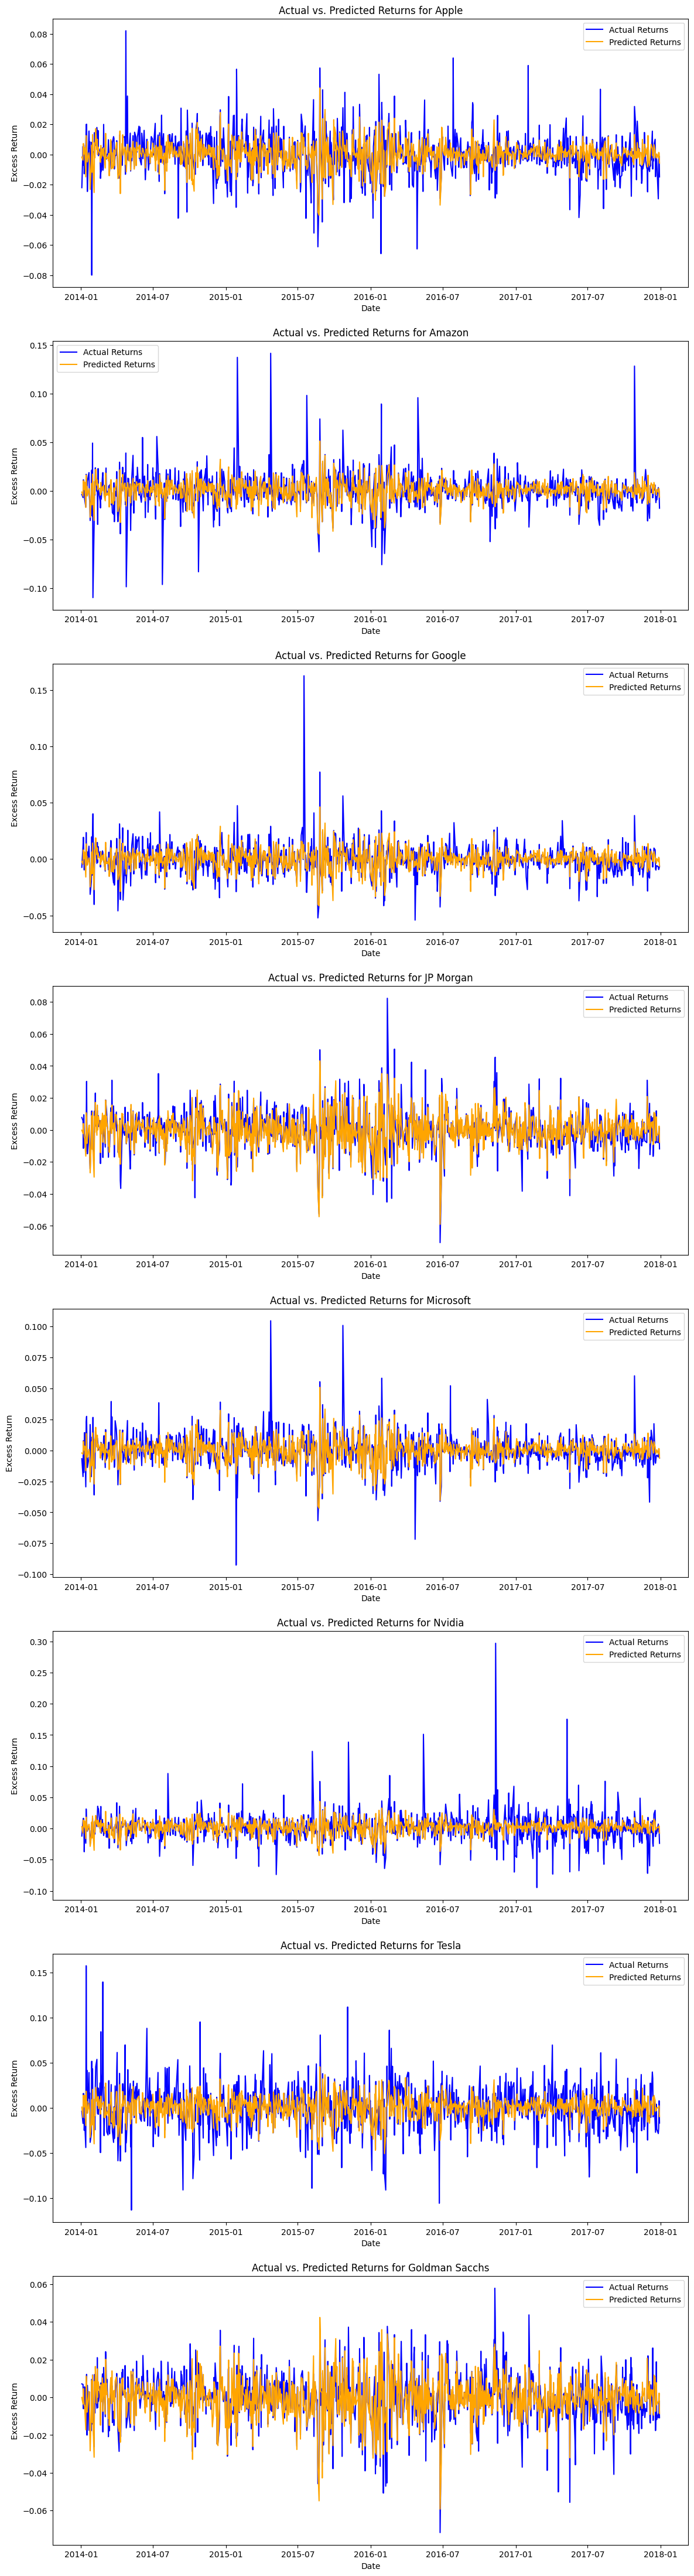

In [ ]:


plt.figure(figsize=(14, 56))

plt.subplot(8,1,1)
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns.index, excess_returns['AAPL_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values.index, expected_return_values['AAPL_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for Apple')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(8,1,2)
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns.index, excess_returns['AMZN_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values.index, expected_return_values['AMZN_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(8,1,3)
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns.index, excess_returns['GOOGL_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values.index, expected_return_values['GOOGL_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for Google')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(8,1,4)
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns.index, excess_returns['JPM_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values.index, expected_return_values['JPM_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for JP Morgan')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(8,1,5)
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns.index, excess_returns['MSFT_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values.index, expected_return_values['MSFT_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for Microsoft')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(8,1,6)
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns.index, excess_returns['NVDA_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values.index, expected_return_values['NVDA_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for Nvidia')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(8,1,7)
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns.index, excess_returns['TSLA_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values.index, expected_return_values['TSLA_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for Tesla')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(8,1,8)
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns.index, excess_returns['GS_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values.index, expected_return_values['GS_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for Goldman Sacchs')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()


plt.show()


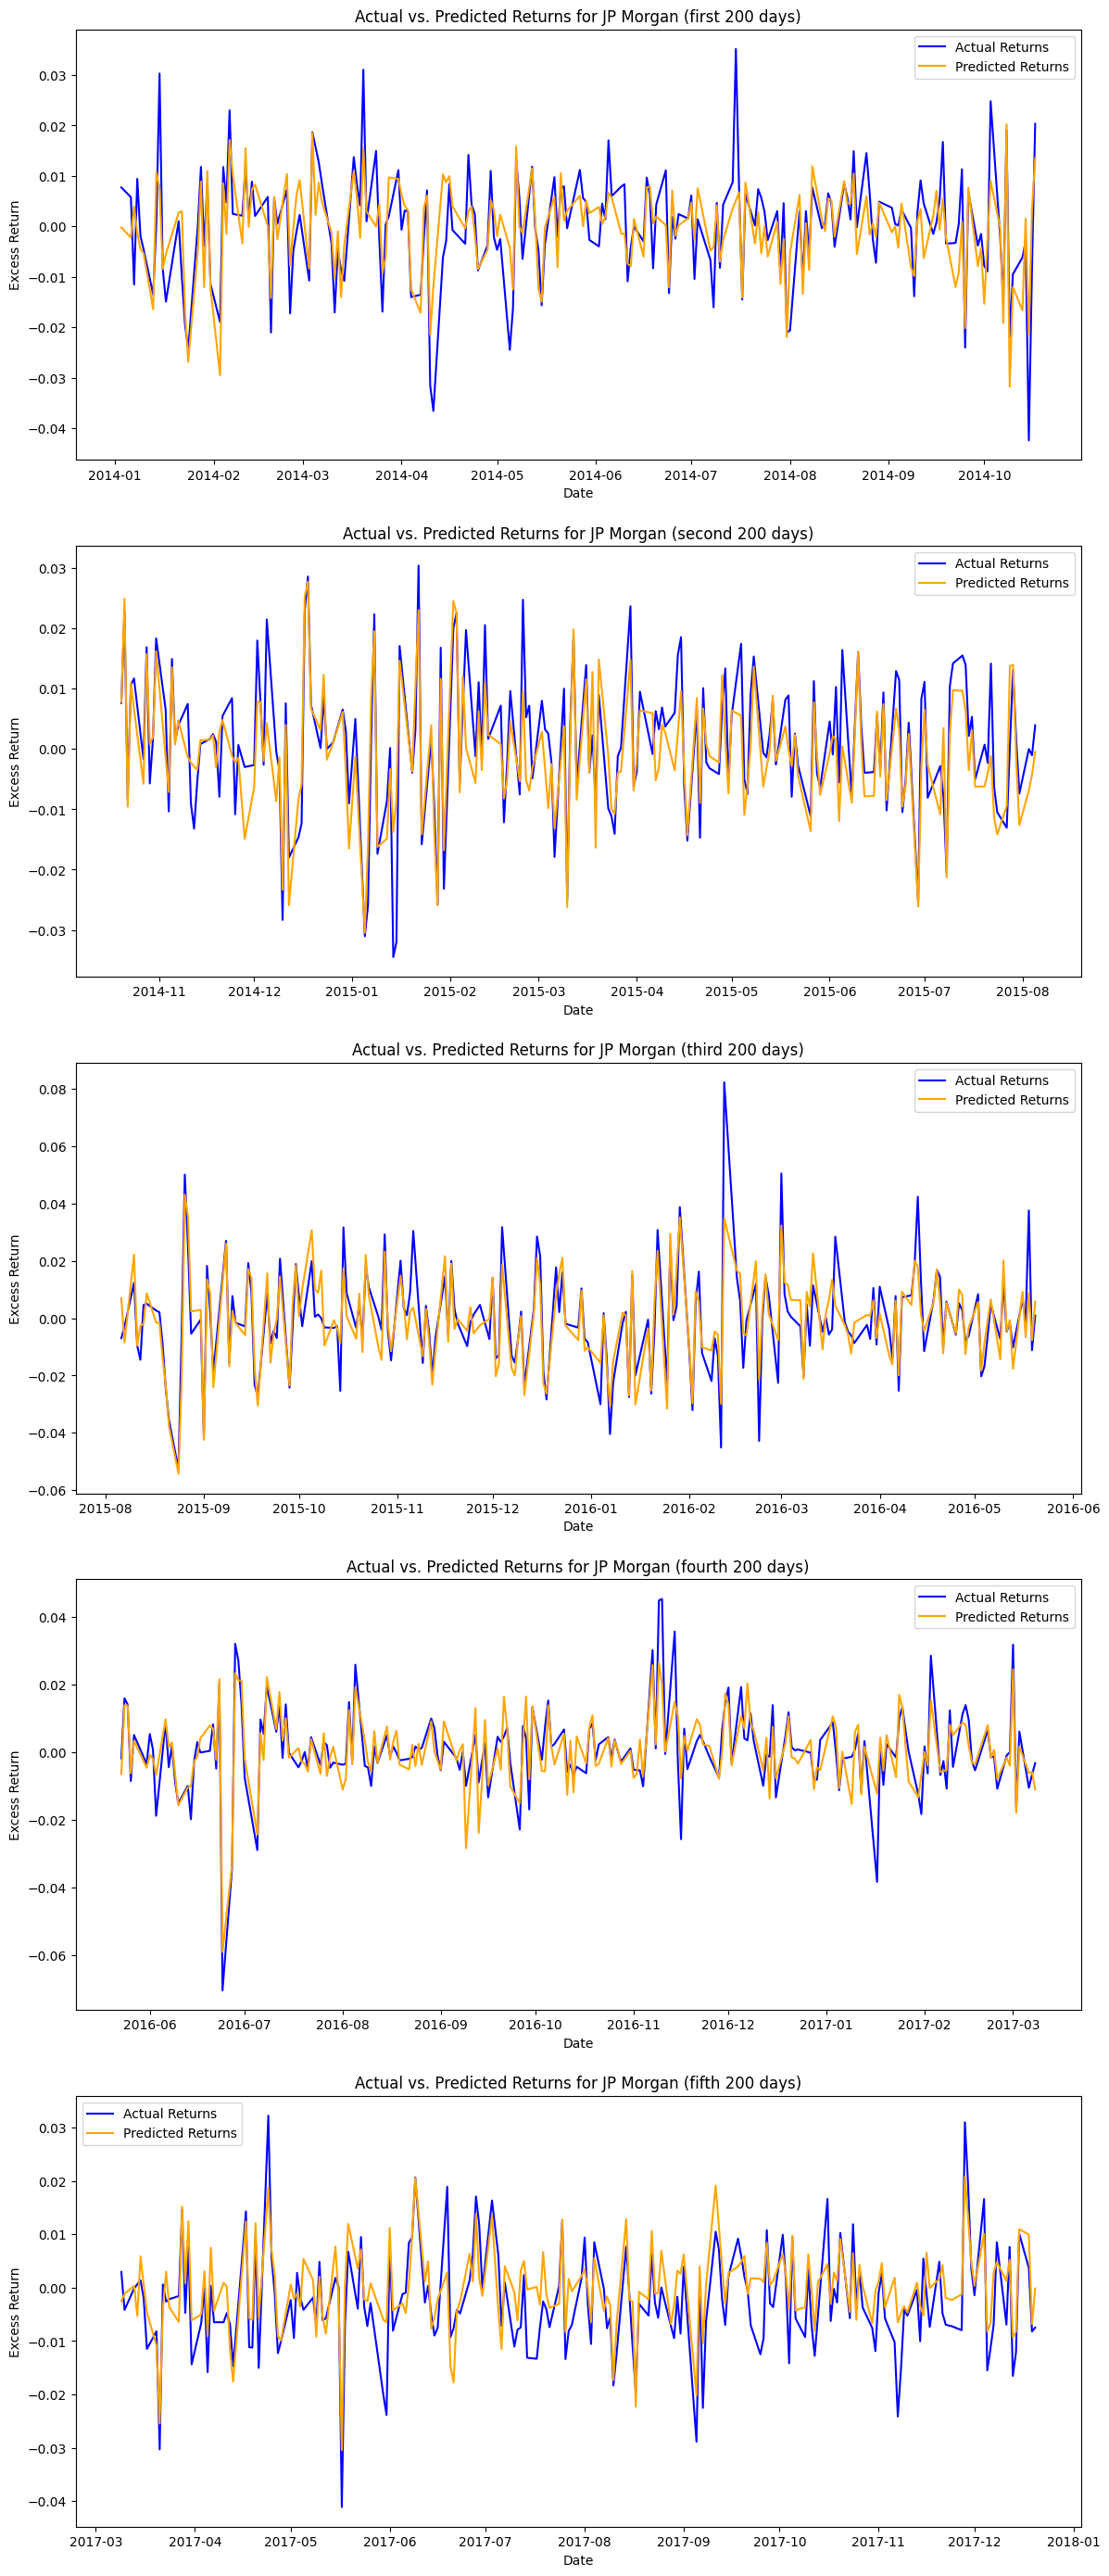

In [ ]:

plt.figure(figsize=(14, 35))

plt.subplot(5,1,1)
excess_returns_T = excess_returns[0:200]
expected_return_values_T = expected_return_values[0:200]
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns_T.index, excess_returns_T['JPM_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values_T.index, expected_return_values_T['JPM_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for JP Morgan (first 200 days)')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(5,1,2)
excess_returns_T = excess_returns[200:400]
expected_return_values_T = expected_return_values[200:400]
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns_T.index, excess_returns_T['JPM_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values_T.index, expected_return_values_T['JPM_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for JP Morgan (second 200 days)')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(5,1,3)
excess_returns_T = excess_returns[400:600]
expected_return_values_T = expected_return_values[400:600]
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns_T.index, excess_returns_T['JPM_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values_T.index, expected_return_values_T['JPM_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for JP Morgan (third 200 days)')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(5,1,4)
excess_returns_T = excess_returns[600:800]
expected_return_values_T = expected_return_values[600:800]
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns_T.index, excess_returns_T['JPM_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values_T.index, expected_return_values_T['JPM_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for JP Morgan (fourth 200 days)')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.subplot(5,1,5)
excess_returns_T = excess_returns[800:1000]
expected_return_values_T = expected_return_values[800:1000]
#plt.figure(figsize=(14, 7))
plt.plot(excess_returns_T.index, excess_returns_T['JPM_excess_return'], label='Actual Returns', color='blue')
plt.plot(expected_return_values_T.index, expected_return_values_T['JPM_excess_return'], label='Predicted Returns', color='orange')
plt.title('Actual vs. Predicted Returns for JP Morgan (fifth 200 days)')
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.legend()

plt.show()


#Markowitz Portfolio Optimization (using predicted returns)


In [ ]:
expected_return_values

,AAPL_excess_return,AMZN_excess_return,GOOGL_excess_return,JPM_excess_return,MSFT_excess_return,NVDA_excess_return,TSLA_excess_return,GS_excess_return
2014-01-03,-0.001724,-0.001428,-0.002024,-0.000189,-0.002147,0.002866,0.000953,-0.00002
2014-01-06,-0.003767,-0.005492,-0.004732,-0.002216,-0.003086,-0.007125,-0.01045,-0.003521
2014-01-07,0.007263,0.010324,0.008135,0.003993,0.007248,0.013659,0.014056,0.004667
2014-01-08,0.000343,0.001067,0.000347,-0.001328,0.000281,0.00243,0.00113,-0.001508
2014-01-09,0.001139,0.0031,0.001739,-0.004496,0.000454,0.004779,0.004792,-0.004243
...,...,...,...,...,...,...,...,...
2017-12-22,0.00042,0.001204,0.000552,-0.003479,0.000429,0.000673,-0.000339,-0.003918
2017-12-26,-0.002139,-0.001628,-0.002285,-0.002393,-0.002773,0.002121,0.000572,-0.002219
2017-12-27,0.001378,0.002404,0.001567,-0.001993,0.001429,0.002532,0.001612,-0.002284
2017-12-28,0.001068,0.001551,0.000855,0.002331,0.001271,0.004188,0.002371,0.002235


In [ ]:
expected_returns_actual = expected_return_values.copy()
for column in expected_returns_actual.columns:
  expected_returns_actual[column] = expected_returns_actual[column] + aligned_data['RF']


expected_returns_actual



,AAPL_excess_return,AMZN_excess_return,GOOGL_excess_return,JPM_excess_return,MSFT_excess_return,NVDA_excess_return,TSLA_excess_return,GS_excess_return
2014-01-03,-0.001724,-0.001428,-0.002024,-0.000189,-0.002147,0.002866,0.000953,-0.00002
2014-01-06,-0.003767,-0.005492,-0.004732,-0.002216,-0.003086,-0.007125,-0.01045,-0.003521
2014-01-07,0.007263,0.010324,0.008135,0.003993,0.007248,0.013659,0.014056,0.004667
2014-01-08,0.000343,0.001067,0.000347,-0.001328,0.000281,0.00243,0.00113,-0.001508
2014-01-09,0.001139,0.0031,0.001739,-0.004496,0.000454,0.004779,0.004792,-0.004243
...,...,...,...,...,...,...,...,...
2017-12-22,0.00442,0.005204,0.004552,0.000521,0.004429,0.004673,0.003661,0.000082
2017-12-26,0.001861,0.002372,0.001715,0.001607,0.001227,0.006121,0.004572,0.001781
2017-12-27,0.005378,0.006404,0.005567,0.002007,0.005429,0.006532,0.005612,0.001716
2017-12-28,0.005068,0.005551,0.004855,0.006331,0.005271,0.008188,0.006371,0.006235


In [ ]:
expected_returns_actual = expected_returns_actual.set_axis(['AAPL','AMZM','GOOGL','JPM','MSFT','NVDA','TSLA','GS'],axis=1)
expected_returns_actual

,AAPL,AMZM,GOOGL,JPM,MSFT,NVDA,TSLA,GS
2014-01-03,-0.001724,-0.001428,-0.002024,-0.000189,-0.002147,0.002866,0.000953,-0.00002
2014-01-06,-0.003767,-0.005492,-0.004732,-0.002216,-0.003086,-0.007125,-0.01045,-0.003521
2014-01-07,0.007263,0.010324,0.008135,0.003993,0.007248,0.013659,0.014056,0.004667
2014-01-08,0.000343,0.001067,0.000347,-0.001328,0.000281,0.00243,0.00113,-0.001508
2014-01-09,0.001139,0.0031,0.001739,-0.004496,0.000454,0.004779,0.004792,-0.004243
...,...,...,...,...,...,...,...,...
2017-12-22,0.00442,0.005204,0.004552,0.000521,0.004429,0.004673,0.003661,0.000082
2017-12-26,0.001861,0.002372,0.001715,0.001607,0.001227,0.006121,0.004572,0.001781
2017-12-27,0.005378,0.006404,0.005567,0.002007,0.005429,0.006532,0.005612,0.001716
2017-12-28,0.005068,0.005551,0.004855,0.006331,0.005271,0.008188,0.006371,0.006235


In [ ]:
!pip install cvxopt
from cvxopt import matrix, solvers

In [ ]:
expected_returns_actual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2014-01-03 to 2017-12-29
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AAPL    1006 non-null   object
 1   AMZM    1006 non-null   object
 2   GOOGL   1006 non-null   object
 3   JPM     1006 non-null   object
 4   MSFT    1006 non-null   object
 5   NVDA    1006 non-null   object
 6   TSLA    1006 non-null   object
 7   GS      1006 non-null   object
dtypes: object(8)
memory usage: 103.0+ KB


In [ ]:
#since the dtype is object, the values in our dataframe are likely stored as strings, so lets first convert them into numbers
expected_returns_actual = expected_returns_actual.apply(pd.to_numeric, errors='coerce')
expected_returns_actual

,AAPL,AMZM,GOOGL,JPM,MSFT,NVDA,TSLA,GS
2014-01-03,-0.001724,-0.001428,-0.002024,-0.000189,-0.002147,0.002866,0.000953,-0.000020
2014-01-06,-0.003767,-0.005492,-0.004732,-0.002216,-0.003086,-0.007125,-0.010450,-0.003521
2014-01-07,0.007263,0.010324,0.008135,0.003993,0.007248,0.013659,0.014056,0.004667
2014-01-08,0.000343,0.001067,0.000347,-0.001328,0.000281,0.002430,0.001130,-0.001508
2014-01-09,0.001139,0.003100,0.001739,-0.004496,0.000454,0.004779,0.004792,-0.004243
...,...,...,...,...,...,...,...,...
2017-12-22,0.004420,0.005204,0.004552,0.000521,0.004429,0.004673,0.003661,0.000082
2017-12-26,0.001861,0.002372,0.001715,0.001607,0.001227,0.006121,0.004572,0.001781
2017-12-27,0.005378,0.006404,0.005567,0.002007,0.005429,0.006532,0.005612,0.001716
2017-12-28,0.005068,0.005551,0.004855,0.006331,0.005271,0.008188,0.006371,0.006235


In [ ]:
expected_returns_actual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2014-01-03 to 2017-12-29
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1006 non-null   float64
 1   AMZM    1006 non-null   float64
 2   GOOGL   1006 non-null   float64
 3   JPM     1006 non-null   float64
 4   MSFT    1006 non-null   float64
 5   NVDA    1006 non-null   float64
 6   TSLA    1006 non-null   float64
 7   GS      1006 non-null   float64
dtypes: float64(8)
memory usage: 103.0+ KB


In [ ]:
#number of stocks
n_assets = len(expected_returns_actual.columns)
n_assets

8

In [ ]:
#covariance matrix of stocks
cov_matrix = np.cov(expected_returns_actual.T.astype(float))
cov_matrix

array([[7.25511130e-05, 8.76700086e-05, 7.79661515e-05, 6.88601149e-05,
        7.95157444e-05, 8.75674121e-05, 9.71837222e-05, 7.17342462e-05],
       [8.76700086e-05, 1.08701298e-04, 9.56209089e-05, 7.26801703e-05,
        9.44062084e-05, 1.08734051e-04, 1.23504352e-04, 7.70802676e-05],
       [7.79661515e-05, 9.56209089e-05, 8.45423648e-05, 6.78083900e-05,
        8.46147454e-05, 9.48746579e-05, 1.06906684e-04, 7.12668725e-05],
       [6.88601149e-05, 7.26801703e-05, 6.78083900e-05, 1.22644784e-04,
        8.15064307e-05, 8.67166003e-05, 8.19039264e-05, 1.23943386e-04],
       [7.95157444e-05, 9.44062084e-05, 8.46147454e-05, 8.15064307e-05,
        8.83156989e-05, 9.35071071e-05, 1.02159763e-04, 8.39774951e-05],
       [8.75674121e-05, 1.08734051e-04, 9.48746579e-05, 8.67166003e-05,
        9.35071071e-05, 1.22459465e-04, 1.35770214e-04, 9.31652794e-05],
       [9.71837222e-05, 1.23504352e-04, 1.06906684e-04, 8.19039264e-05,
        1.02159763e-04, 1.35770214e-04, 1.54166818e-04, 8.

In [ ]:
print(cov_matrix==cov_matrix.T)

[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


In [ ]:
#now let us produce the optimal portfolio for the returns of the stocks on the 2nd last date (2017-12-29)
optimize_data = expected_returns_actual.iloc[-2]
optimize_data = optimize_data.T
optimize_data

,2017-12-28
AAPL,0.005068
AMZM,0.005551
GOOGL,0.004855
JPM,0.006331
MSFT,0.005271
NVDA,0.008188
TSLA,0.006371
GS,0.006235


In [ ]:
#the market interest free rate for the same date is
market_RF = aligned_data.iloc[-2]['RF']
market_RF

0.004

In [ ]:
#converted expected returns of stocks into array
mu = optimize_data.values.flatten()
print(mu)

[0.00506832 0.00555117 0.00485516 0.00633099 0.00527127 0.0081875
 0.00637134 0.00623485]


In [ ]:
eigvals = np.linalg.eigvals(cov_matrix)
print(eigvals)

[ 7.52849697e-04  1.05307999e-04  2.11518226e-05  3.31719012e-08
  4.52549644e-20  1.13254587e-20  3.35323567e-21 -2.53037264e-20]


In [ ]:
cov_matrix += np.eye(n_assets)*10e-5  # Add small value to diagonal to make sure eigenvalues>0
#if eigenvalues<0, then portfolio variance may be negative, which is not possible in real life applications

In [ ]:
eigvals = np.linalg.eigvals(cov_matrix)
print(eigvals)
#this is to make sure that no negative variances are possible (to match real world application)

[8.52849697e-04 2.05307999e-04 1.21151823e-04 1.00033172e-04
 1.00000000e-04 1.00000000e-04 1.00000000e-04 1.00000000e-04]


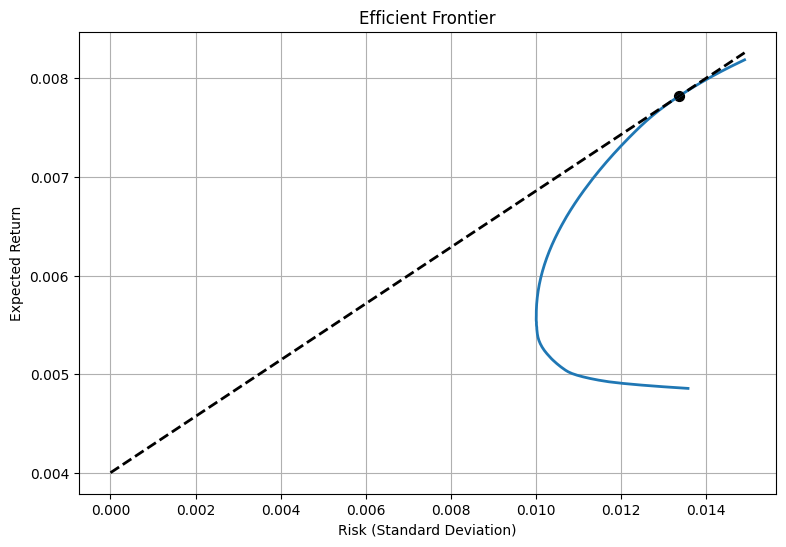

In [ ]:
# Define the range of target returns for the efficient frontier
target_returns = np.linspace(np.min(mu), np.max(mu), 200)

# Prepare lists to store portfolio risk (standard deviation) and returns
portfolio_risks = []
portfolio_returns = []

# Constraints setup for quadratic programming
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

for target in target_returns:
    # Objective: Minimize variance (risk)
    P = matrix(cov_matrix)  # Covariance matrix
    q = matrix(np.zeros(n_assets))  # No linear term (zero vector)

    # Inequality constraints for weights >= 0 (non-negative weights)
    G = matrix(-np.identity(n_assets))  # -weights <= 0
    h = matrix(np.zeros(n_assets))  # Zero vector for inequality constraints

    # Equality constraint for sum(weights) = 1 and weights * mu = target return
    A = matrix(np.vstack([np.ones(n_assets), mu]), (2, n_assets))
    b = matrix([1.0, target])

    # Solve quadratic programming problem
    solvers.options['show_progress'] = False  # Suppress solver output
    sol = solvers.qp(P, q, G, h, A, b)
    weights = np.array(sol['x']).flatten()

    # Calculate risk and return for the portfolio
    portfolio_variance = calculate_portfolio_variance(weights, cov_matrix)
    portfolio_risk = np.sqrt(portfolio_variance)  # Standard deviation (risk)
    portfolio_return = np.dot(weights, mu)

    # Store the results
    portfolio_risks.append(portfolio_risk)
    portfolio_returns.append(portfolio_return)

#required variables to plot CML
#find maximum sharpe ratio in the efficient frontier
sharpe_ratios = [(r - market_RF)/risk for r,risk in zip(portfolio_returns,portfolio_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
#expected return and risk of the portfolio with highest sharpe ratio (market portfolio)
market_portfolio_return = portfolio_returns[max_sharpe_idx]
market_portfolio_risk = portfolio_risks[max_sharpe_idx]
#calclating the CML
cml_risks = np.linspace(0, max(portfolio_risks), 100)
cml_returns = market_RF + ((market_portfolio_return - market_RF) / market_portfolio_risk)*cml_risks


# --- Plot the Efficient Frontier ---
plt.figure(figsize=(9, 6))


plt.plot(portfolio_risks, portfolio_returns, lw=2)
plt.plot(cml_risks, cml_returns, color = 'black', linestyle = '--', lw=2)
plt.scatter(market_portfolio_risk, market_portfolio_return, marker='o', color='black', s=50)
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)

plt.show()

In [ ]:
#the above is the plot showing the efficient frontier of my portfolio of 8 stocks, and the capital market line (CML)
#the highlited point in black is my market portfolio, which is the portfolio with the highest sharpe ratio.

In [ ]:
#now let us fetch the optimal weights for stocks in portfolio for a return of 0.0075
t_return = 0.0075

P_ = matrix(cov_matrix)
q_ = matrix(np.zeros(n_assets))


G_ = matrix(-np.identity(n_assets))
h_ = matrix(np.zeros(n_assets))


A_ = matrix(np.vstack([np.ones(n_assets), mu]), (2, n_assets))
b_ = matrix([1.0, t_return])


solvers.options['show_progress'] = False
sol = solvers.qp(P_, q_, G_, h_, A_, b_)
weights_ = np.array(sol['x']).flatten()

weights_

array([2.61018985e-03, 3.56699013e-03, 1.59925835e-04, 2.05114656e-01,
       1.86380682e-03, 6.40355471e-01, 1.85991707e-02, 1.27729790e-01])

In [ ]:
for i in range(len(weights_)):
  print('weight of ' + expected_returns_actual.columns[i] + ' = ' + str(weights_[i]))

weight of AAPL = 0.0026101898504011286
weight of AMZM = 0.0035669901304771576
weight of GOOGL = 0.000159925835471278
weight of JPM = 0.2051146562718995
weight of MSFT = 0.0018638068163132062
weight of NVDA = 0.6403554705338065
weight of TSLA = 0.018599170704674456
weight of GS = 0.1277297898569567


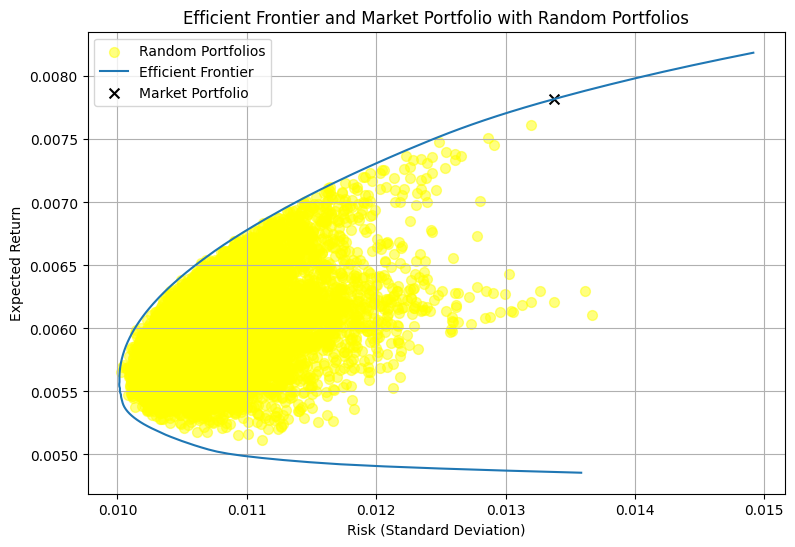

In [ ]:
#plotting random portfolios to show points within the frontier
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Number of portfolios to generate
n_random_portfolios = 10000

# Generate random portfolios (weights sum to 1)
random_portfolio_risks = []
random_portfolio_returns = []

for _ in range(n_random_portfolios):
    random_weights = np.random.dirichlet(np.ones(n_assets), size=1).flatten()  # Dirichlet distribution ensures sum of weights = 1
    portfolio_return = np.dot(random_weights, mu)  # Portfolio return
    portfolio_variance = calculate_portfolio_variance(random_weights, cov_matrix)  # Portfolio variance
    portfolio_risk = np.sqrt(portfolio_variance)  # Portfolio risk (standard deviation)

    random_portfolio_returns.append(portfolio_return)
    random_portfolio_risks.append(portfolio_risk)

# --- Plot the Efficient Frontier with scatter points for random portfolios ---
plt.figure(figsize=(9, 6))

# Scatter plot for random portfolios inside the feasible region
plt.scatter(random_portfolio_risks, random_portfolio_returns, c='yellow', marker='o', s=50, alpha=0.5, label='Random Portfolios')

# Scatter plot for portfolios on the efficient frontier
plt.plot(portfolio_risks, portfolio_returns, label='Efficient Frontier')


# Highlight the Market Portfolio (max Sharpe Ratio)
plt.scatter(market_portfolio_risk, market_portfolio_return, marker='x', color='black', s=50, label='Market Portfolio')

# Plot formatting
plt.title('Efficient Frontier and Market Portfolio with Random Portfolios')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
